# 0. Mathematical Functions

This is a course on complex methods in the physical sciences. Before dealing with complex numbers, however, let us undertake a brief review of real mathematical functions and their properties.

## Real functions

A mathematical function, denoted $f$, takes an **input** $x$ (which is also called an **argument**), and returns an **output** $f(x)$. For now, we consider the case where both $x$ and $f(x)$ are real numbers. The set of possible inputs is the function's **domain**, and the set of possible outputs is the **range**.

Every function must have a well-defined output: for any $x$ in the domain, $f(x)$ must be a specific, unambiguous number. In other words, a function must be either a one-to-one (injective) mapping or a many-to-one mapping; the mapping cannot be one-to-many or many-to-many:

<img src="img/mathfunctions.png" alt="Figure of one-to-one, many-to-one, and one-to-many mappings.">

Simple examples of functions are those based on elementary algebra operations:

$$f(x) = x + 2 \,\;\;\qquad\qquad \text{(a one-to-one function)}$$
$$f(x) = x^2 + 2x + 4 \qquad \text{(a many-to-one function)}$$


<a name="exponential"></a>
## The exponential function

The exponential function, denoted by "$\exp$", is one of the most important functions in mathematics. We will deal with it numerous times, in many different contexts.

To motivate its definition, let us start by thinking about what it means to take a number $x$ to the power of $y$:

$$f(x) = x^y.$$

For values of $y$ in the natural numbers $\mathbb{N} \equiv \{1,2,3,\dots\}$, the power operation simply means multiplying $x$ by itself $y$ times.  For example, $x^4 = x \cdot x \cdot x \cdot x$.  But what about non natural number powers, like $x^{-1}$ or $x^{1/2}$ or $x^{\pi}$?

To help answer this question, we define the exponential function as the following limiting infinite series:

$$\exp(x) \equiv 1 + \sum_{n=1}^\infty\frac{x^n}{n!}, \quad\mathrm{for}\;\, x \in \mathbb{R}.$$

Note that the infinite series in this definition uses natural number powers only.  The domain of this function is the set of real numbers, $\mathbb{R}$, and its range is the set of positive numbers, $\mathbb{R}^+$.

In Python, you can compute the exponential using the [`exp`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) function, which is defined in the Numpy (Numeric Python) package, as shown in the following example:

In [1]:
from numpy import exp

x = 2.0

## Print the value of exp(x)
print(exp(x))

## Compare this to the first few orders of the series expansion:
print(1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120)

7.38905609893065
7.266666666666667


In the above example, try altering the value of $x$ and see how the outputs change.  (When you encounter other Python examples in these notebooks, feel free to play around with them similarly.)

Here is a graph of the exponential function:
<a name="exponential_plot"></a>

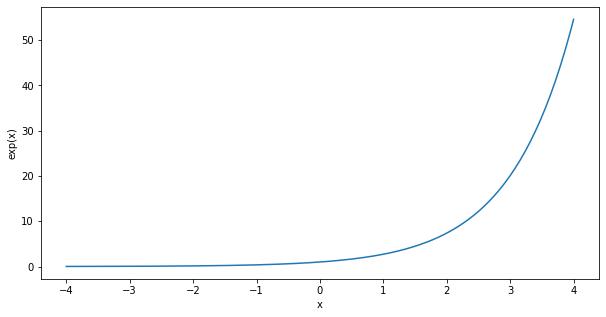

In [16]:
## Plot the exponential function
%matplotlib inline
from numpy import linspace, exp
import matplotlib.pyplot as plt

x = linspace(-4, 4, 200)   # Array of 200 numbers from -5 to 5
y = exp(x)                 # The corresponding values of the exp function

plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('x'); plt.ylabel('exp(x)');
plt.show()

<a name="exponential_properties"></a>
From the above, we see that the exponential has several noteworthy features:

1. The value of $\exp(x)$ increases *extremely* quickly with increasing $x$.  Going in the other direction, the value approaches zero very quickly with decreasing $x$.
2. $\exp(0) = 1$. (This follows from the definition of the exponential.)
3. For all $x, y \in \mathbb{R}$, $$\exp(x+y) = \exp(x)\,\exp(y)$$ ([Try proving this as an exercise](#exercises). The key ingredients for the proof are (i) the above definition of the exponential and (ii) the binomial theorem.)
4. As a corollary of properties 2 and 3, $$\exp(-x) = 1/\exp(x).$$.


## The logarithm function

Since the exponential is a one-to-one function, its inverse is a well-defined function.  We call this the **natural logarithm**:

$$\ln(x) \equiv y \;\; \mathrm{such}~\mathrm{that}\; \exp(y) = x.$$

For brevity, we will henceforth use "logarithm" to refer to the natural logarithm, unless otherwise stated (the "non-natural" logarithms are not our concern in this course). The domain of the logarithm is $y \in \mathbb{R}^+$, and its range is $\mathbb{R}$.

In Python, the logarithm can be computed using [`log`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) from the Numpy module, as shown in the following example:

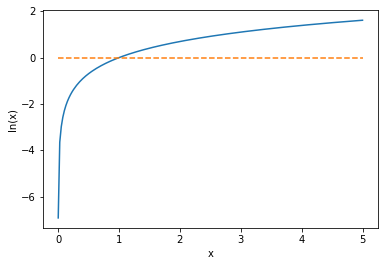

In [17]:
## Plot the natural logarithm function
%matplotlib inline
from numpy import linspace, log
import matplotlib.pyplot as plt

x = linspace(1e-3, 5.0, 200)
y = log(x)

plt.plot(x, y)
plt.plot([0., xlim], [0., 0.], '--')   # Plot horizontal dashes at x = 0
plt.xlabel('x'); plt.ylabel('ln(x)')
plt.show()

In the above graph, observe that $\ln(x)$ increases extremely slowly with $x$, which is precisely the opposite of the exponential's behavior.

Using the [previously-defined properties of the exponential](#exponential_properties), we can prove that the logarithm satisfies the product and quotient rules

$$\begin{aligned}\ln(xy) &= \ln(x) + \ln(y) \\ \ln(x/y) &= \ln(x) - \ln(y)\end{aligned}$$

<a name="powers"></a>
## Non-natural powers

Having defined the exponential and logarithm, we have the tools needed to address the issue raised earlier, i.e. how to define non-natural power operations.  First, observe that

$$\textrm{For}\;\,y \in \mathbb{N}, \;\;\;\ln(x^y) = \underbrace{\ln(x)\ln(x)\cdots\ln(x)}_{y\;\text{times}} = y \ln(x).$$

Hence, by applying the exponential to each side of the above equation,

$$x^y = \exp[y \ln(x)] \quad \mathrm{for} \;\,y \in \mathbb{N}.$$

We can generalize the above equation so that it holds for any positive $x$ and real $y$, not just $y \in \mathbb{N}$.  In other words, we treat this as our *definition* of the power operation for non-natural powers:

$$x^y \equiv \exp[y \ln(x)] \quad\; \mathrm{for}\;\, x \in \mathbb{R}^+, \;y \notin \mathbb{N}.$$

By this definition, the power operation always gives a positive result.  And for $y \in \mathbb{N}$, the result of the formula is consistent with the standard definition based on multiplying $x$ by itself $y$ times.

This generalization of the power operation leads to several important consequences:
1. $\displaystyle x^0 = 1 \;\;\mathrm{for}\;\, x \in \mathbb{R}^+.$
2. Negative powers are reciprocals: $$x^{-y} = \exp[-y\ln(x)] = \exp[-\ln(x^y)] = \frac{1}{x^y}.$$
3. The output of the exponential function is equivalent to a power operation:$$\displaystyle\exp(y) = e^y\quad\mathrm{where}\;\, e \equiv \exp(1) = 2.718281828459\!\dots$$(This follows by plugging in $x=e$ and using the fact that $\ln(e) = 1$.)
4. For $x \le 0$, the meaning of $x^y$ for non-natural $y$ is ill-defined, since the logarithm does not accept negative inputs.

## Trigonometric functions<a name="trigonometric"></a>

Another extremely important group of functions are the fundamental trignonometric functions $\sin$, $\cos$, and $\tan$.  These can be defined in terms of the geometric ratios of the sides of right-angled triangles, as shown below:

<img src="img/trigonometry.png" alt="Basic definitions of trigonometric functions." width="300">

If we use this basic definition, the domain is $\theta \in [0, \,\pi/2)$, where the input angle $\theta$ is given in radians.

We can generalize the definition using the following scheme, which allows for negative values of $a$ and/or $b$:

<img src="img/trigonometry2.png" alt="Enhanced definitions of trigonometric functions." width="310">

With this, the domain is extended to $\theta \in [0,\,2\pi)$. We can further extend the domain to all real numbers, $\theta \in \mathbb{R}$, by treating input values modulo $2\pi$ as equivalent; in other words, $f(\theta + 2\pi) = f(\theta)$.  With this generalization, the trigonometric functions become many-to-one functions.

According to the [Pythagorean theorem](http://www.faculty.umb.edu/gary_zabel/Courses/Phil%20281b/Philosophy%20of%20Magic/Arcana/Neoplatonism/Pythagoras/index.shtml.html),

$$\big[\sin(\theta)\big]^2 + \big[\cos(\theta)\big]^2 = 1.$$

<a name="trigonometric_addition"></a>
Using this, we can go on to prove a variety of identities, like the addition identities

$$\begin{aligned}\sin(\theta_1 + \theta_2) &= \sin(\theta_1) \cos(\theta_2) + \cos(\theta_1)\sin(\theta_2) \\\cos(\theta_1 + \theta_2) &= \cos(\theta_1) \cos(\theta_2) - \sin(\theta_1)\sin(\theta_2)\end{aligned}$$

As you may recall, the trigonometric proofs for these identities involve drawing complicated triangle diagrams, cleverly applying the Pythagorean formula, etc.  ([As an exercise](#exercises), try proving either of the above identities trigonometrically.)  There are two problems with such proofs: (i) they require some ingenuity in the construction of the triangle diagrams, and (ii) it may not be obvious whether the proofs work if the angles lie outside $[0,\pi/2)$.

Happily, there is a solution to both problems. As we'll soon see, such trigonometric identities can be proven algebraically by using [complex numbers](03_complex_numbers.ipynb).

## Hyperbolic functions<a name="hyperbolic"></a>

The hyperbolic functions are important functions defined in terms of exponentials:

$$\begin{aligned}\sinh(x) &= \frac{1}{2}\left(e^{x} - e^{-x}\right) \\ \cosh(x) &= \frac{1}{2}\left(e^{x} + e^{-x}\right) \\ \tanh(x) &= \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}\end{aligned}$$

They have properties that are intriguingly similar to the trignometric functions. For example,

$$\begin{aligned}\sinh(x+y) &= \sinh(x)\cosh(y) + \cosh(x)\sinh(y) \\
\cosh(x+y) &= \cosh(x)\cosh(y) + \sinh(x)\sinh(y)\end{aligned}$$

Because of these identities, it is sometimes more convenient to work with hyperbolic functions rather than exponentials. During this course, we will learn about the intricate relationship between the hyperbolic and trigonometric functions.

<a name="continuity"></a>
## Continuity

**Continuity** is an important concept in the theory of real functions. A continuous function is one whose output $f(x)$ does not undergo abrupt jumps when $x$ changes by tiny amounts.  A function can be continuous over its entire domain, or only a subset of its domain. For example, $\sin(x)$ is continuous for all $x$, whereas $f(x) = 1/x$ is discontinuous at $x = 0$.  Another function that is discontinuous at $x=0$ is the step function

$$\Theta(x) = \left\{\begin{array}{ll} 1, &\;\;\;\textrm{for} \; x \ge 0\\ 0,&\;\;\; \textrm{otherwise.}\end{array}\right.$$

Mathematicians have even come up with functions that are discontinuous everywhere in their domain, but we won't be dealing with such cases.

The rigorous definition of continuity is as follows:

> A function $f$ is continuous at a point $x_0$ if, for any $\epsilon > 0$, we can find a $\delta > 0$ such that setting $x$ closer to $x_0$ than a distance of $\delta$ brings $f(x)$ closer to $f(x_0)$ than the specified distance $\epsilon$.

That's a pretty complicated sentence, and it may be easier to understand using the illustration below:

In [90]:
## Generate an interactive graph illustrating the concept of continuity
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import array, linspace, tanh, arctanh
import matplotlib.pyplot as plt

def plot_continuity(epsilon):
    x = linspace(0.0, 3.0, 100)
    y = tanh(x-1) 

    xsteps = array([1.0, 1 + arctanh(epsilon), 1 + 0.5 * arctanh(epsilon)])
    ysteps = tanh(xsteps - 1)
    colors = ['black', 'blue', 'red']
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.plot(x, y)
    for n in range(3):  # Plot vertical/horizontal guiding lines
        plt.plot([xsteps[n], xsteps[n]], [-1, ysteps[n]], 'grey')
        plt.plot([0, xsteps[n]], [ysteps[n], ysteps[n]], 'grey')
        plt.plot(0, ysteps[n], 'o', color=colors[n], markersize=8)

    plt.title("For each epsilon, f(x0)+epsilon is indicated by a blue dot.\n\
One can choose delta so that for all x0 < x < x0 + delta,\n\
f(x) is closer to f(x0) than the blue dot.")
    plt.text(xsteps[0]-0.03, -0.9, 'x0', color='black')
    plt.text(xsteps[2]-0.06, -0.9, 'x0+delta', color='red')

    plt.text(0.04, ysteps[0]+0.04, 'f(x0)', color='black')
    plt.text(0.04, ysteps[1]+0.04, 'f(x0) + epsilon', color='blue')
    
    plt.axis([-0.05, 2.4, -0.8, 1.0])
    plt.xlabel('x', labelpad=25); plt.ylabel('f(x)')
    ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([])
    plt.show()

interact(plot_continuity,
         epsilon=FloatSlider(min=0.2, max=0.8, step=0.05, value=0.6));

interactive(children=(FloatSlider(value=0.6, description='epsilon', max=0.8, min=0.2, step=0.05), Output()), _…

A counter-example, with a function that has a discontinuity at some $x_0$, is shown below.  If we choose $\epsilon$ smaller than the gap, then no matter what value of $\delta > 0$ we try, any choice of $0 < x < \delta$ will give a value of $f(x)$ that's further than $\epsilon$ from $f(x_0)$. Hence, the continuity condition is violated for sufficiently small choices of $\epsilon = 1/2$, and we say that $f$ is **discontinuous** at $x_0$.

In [102]:
## Run this code cell to see an interactive graph demonstrating discontinuity
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, tanh, arctanh
import matplotlib.pyplot as plt

def plot_discontinuity(epsilon):
    dy = 0.25
    xa, xb, x0 = linspace(0., 1., 50), linspace(1.0, 3.0, 50), 1.0
    ya, yb, y0 = tanh(xa-1)- dy, tanh(xb-1)+dy, tanh(x0-1)-dy

    y1 = y0 + epsilon; x1 = max(x0, 1 + arctanh(y1-dy))
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.plot(xa, ya, color='#7812ff')
    plt.plot(xb, yb, color='#7812ff')
    plt.plot([x0,x0], [-1.,y0], 'grey', [0, x0], [y0, y0], 'grey')
    plt.plot([x1,x1], [-1.,y1], 'grey', [0, x1], [y1, y1], 'grey')
    plt.plot(0, y0, 'o', color='black', markersize=8)
    plt.plot(0, y1, 'o', color='blue', markersize=8)
    plt.title("If epsilon is smaller than the gap,\n\
For any delta and x0 < x < x0 + delta,\n\
f(x) is closer to f(x0) than the blue dot.")
    plt.text(x0-0.02, -0.9, 'x0', color='black')
    plt.text(-0.03, y0-0.15, 'f(x0)', color='black')
    plt.annotate('', xy=(0.5, y0), xycoords='data', xytext=(0.5, y1), textcoords='data',
                 arrowprops={'color': 'blue', 'arrowstyle': '<->', 'linewidth':2})
    plt.text(0.55, 0.5*y0+0.5*y1, 'epsilon', color='blue')
    
    if epsilon > 2*dy:
        delta = 0.5 * (x1 - x0)
        x2 = x0 + delta
        y2 = tanh(x2-1) + dy
        plt.plot([x2,x2], [-1.,y2], 'grey', [0, x2], [y2, y2], 'grey')
        plt.plot(0, y2, 'o', color='red', markersize=8)
        plt.annotate('', xy=(x0, -0.6), xycoords='data', xytext=(x2, -0.6), textcoords='data',
                     arrowprops={'color': 'red', 'arrowstyle': '<->', 'linewidth':2})
        plt.text(0.5*(x0+x2)-0.05, -0.5, 'delta', color='red')
    else:
        plt.plot([x0,x0], [-1.,yb[0]], 'grey', [0, x0], [yb[0], yb[0]], 'grey')
        plt.plot(0, yb[0], 'o', color='red', markersize=10)

    plt.axis([-0.05, 2.0, -0.8, 1.0])
    plt.xlabel('x', labelpad=25); plt.ylabel('f(x)')
    ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([])
    plt.show()

interact(plot_discontinuity,
         epsilon=FloatSlider(min=0.2, max=1.2, step=0.05, value=0.8));

interactive(children=(FloatSlider(value=0.8, description='epsilon', max=1.2, min=0.2, step=0.05), Output()), _…

## Exercises
<a name="exercises"></a>

1. <a name="exp_alt"></a>An alternative definition of the exponential function is the limiting expression$$\exp(x) \equiv \lim_{n\rightarrow\infty} \left(1+\frac{x}{n}\right)^n.$$Prove that this is equivalent to the definition in terms of an infinite series,<br/>$$\exp(x) \equiv 1 + \sum_{n=1}^\infty\frac{x^n}{n!}.$$
2. Prove that $$\exp(x+y) = \exp(x)\,\exp(y)$$using the definition of the exponential as an infinite series.  Your proof must avoid using the concept of "raising to the power" of a non-natural number; this is to avoid circular logic, since this feature of the exponential function can be used in the [generalized definition of the power operation](#powers).<br/>[(Solution)](11_solutions.ipynb#00_02)
3. One of the most important features of the exponential function $\exp(x)$ is that it becomes large *extremely* quickly with increasing $x$.  To illustrate this behavior, consider the [graph of the exponential function](#exponential_plot) shown previously in this notebook. By default, the graph plots up to $x = 4$, and on your computer screen the height of the graph should be around 4 cm.  Suppose we keep to the same resolution, and plot up to $x = 10$; how high would the graph be?  What if we plot up to $x = 20$?
4. Prove that$$\exp(x) = e^x.$$
[(Solution)](11_solutions.ipynb#00_04)
5. A "non-natural" logarithm of base $c$ is defined as
$$\log_c(x) = y \quad\mathrm{where}\;\; c^y = x.$$
Using the [generalized definition of the power operation](#powers), derive an expression for the non-natural logarithm in terms of the natural logarithm.
6. Prove, using trigonometry, that$$\sin(\theta_1 + \theta_2) = \sin(\theta_1) \cos(\theta_2) + \cos(\theta_1)\sin(\theta_2).$$You may assume that $\theta_1, \theta_2 \in [0, \pi/2].$
7. Prove, using the [trigonometric addition formulas](#trigonometric_addition), that$$\begin{align} \cos(3x) &= 4[\cos(x)]^3 -3\cos(x) \\ \sin(3x) &= 3\sin(x)-4[\sin(x)]^3\end{align}$$
